In [39]:
import numpy as np
from blab.array import loadmat
from glob import glob
from os.path import basename
import scipy.io as spio
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
fnames = sorted(glob('../data/plv_coherence/*.mat'))
sas = spio.loadmat(fnames[0])
res = []
for i in fnames:
    temp = basename(i).split('_')
    field = 'plvspctrm' if temp[0] == 'PLV' else 'cohspctrm'
    sas = spio.loadmat(i)['conn']
    for sub in range(15):
        for band in range(2):
            for sess in range(-2, 0):
                if sub != 9:
                    temp_val = sas[sub][band][0][field][sess][0, 1]
                else:
                    temp_val = np.nan
                res.append(temp_val)
res = np.array(res).reshape(2, 2, 2, 15, 2, 2) # (metric, day, base/bgr, sub, band, sess)
metrics = ['Coherence', 'PLV']
days = ['TMS', 'Sham']
phases = ['Base', 'Background']
subs = np.arange(15, dtype=int).tolist()
bands = ['Theta', 'LowAlpha']
sessions = ['Im1', 'Im2']
names = ['Metric', 'Day', 'Phase', 'Subject', 'Band', 'Session']
index = pd.MultiIndex.from_product([metrics, days, phases, subs, bands, sessions], names=names)
df = pd.DataFrame(res.flatten(), columns=['Value'], index=index)
df.to_csv('../data/plv_coherence/plv_coherence_vals.csv')

In [6]:
df = pd.read_csv('../data/plv_coherence/plv_coherence_vals.csv').query('Metric == "PLV"')

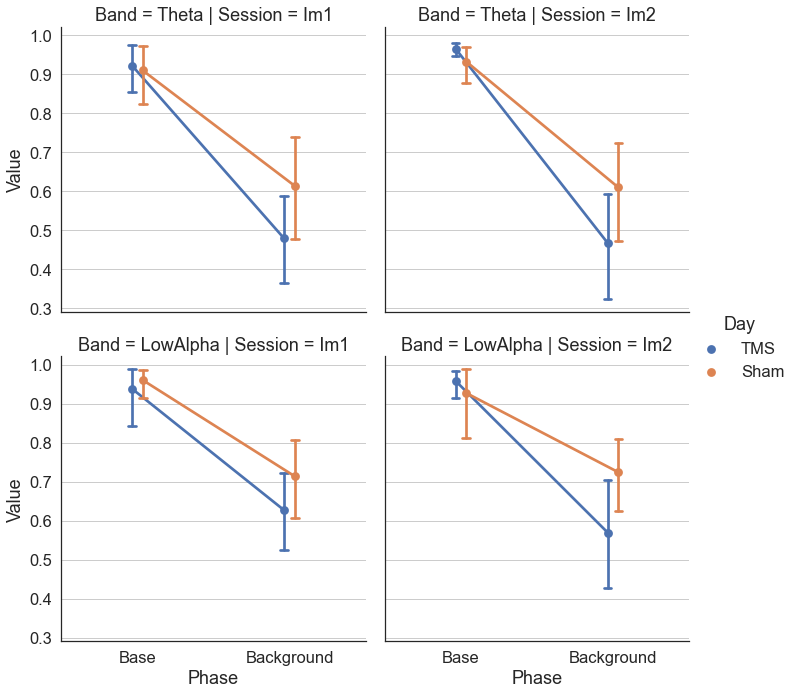

In [46]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
sns.set(font_scale=1.5)
sns.set_style("white", {'axes.grid' : True})
g = sns.catplot(data=df, x='Phase', y='Value', hue='Day', col='Session', row='Band', kind='point', dodge=0.07, capsize=0.05)
g.savefig('plots/plv/value~phase.pdf')

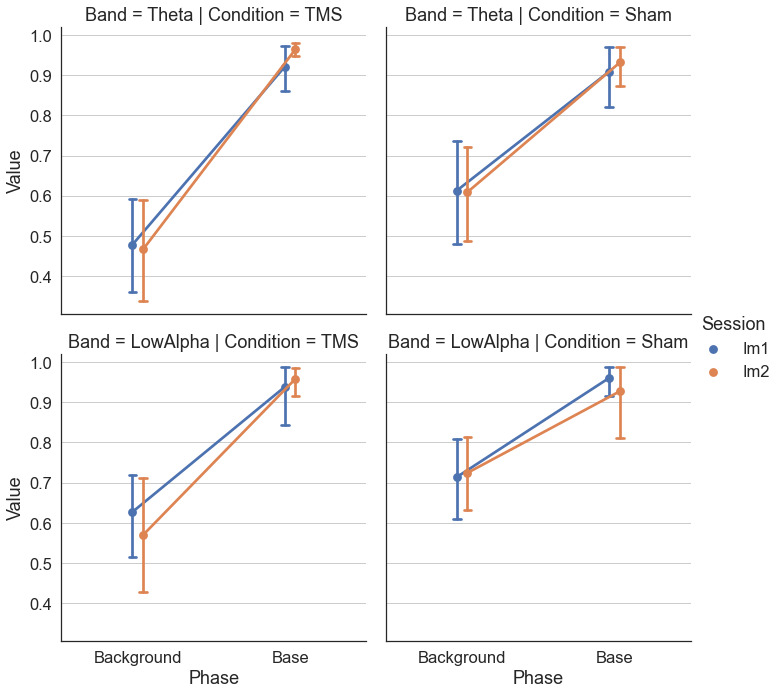

In [67]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
sns.set(font_scale=1.5)
sns.set_style("white", {'axes.grid' : True})
data = df.copy()
data.rename(columns={'Day': 'Condition'}, inplace=True)
g = sns.catplot(
    data=data,
    x='Phase',
    y='Value',
    hue='Session',
    col='Condition',
    row='Band',
    kind='point',
    dodge=0.07,
    capsize=0.05,
    order=['Background', 'Base']
)

g.savefig('plots/plv/value~phase.pdf')